In [1]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from joblib import dump, load

filename="SUR5_Train.DAT"
mode = "train"
#mode = "validate"



In [2]:
f = open(filename)
data=[]
X=[]
y=[]
lines=f.readlines()
header=lines[0].split()
n=int(lines[1])
for line in lines[2:]:
    if '/' in line:
        spl= line.split()
        skip_samples=int(float(spl[0]))
        atomic=float(spl[1])
        beta=float(spl[2])
    else:
        dt=line.split()
        dose = float(dt[0])
        avg_life=float(dt[1])
        X.append([atomic,beta,dose])
        y.append(avg_life)
        to_append=[atomic,beta,dose,avg_life]
        data.append(to_append)

df = pd.DataFrame(data)
df.columns = ['betha', 'doze', 'atomic_number','avg_survival_rate']


In [3]:
X = df[['betha', 'doze', 'atomic_number']]
Y = df['avg_survival_rate']
if mode=="train":
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 19)

In [4]:
if mode=="train":
      parameters = {
            'min_samples_split': [10, 20, 30],
            'criterion': ['mse'],
            'n_estimators': [1, 10, 100, 1000]
      }
      reg1 = GridSearchCV(RandomForestRegressor(), parameters)
      reg2 = tree.DecisionTreeRegressor()
      vreg = VotingRegressor(estimators=[('rf', reg1),('tr',reg2)])
      vreg.fit(X_train, y_train)

      dump(vreg,'best_model.joblib')
else:
      vreg = load('best_model.joblib')

Kwadrat wsp. korelacji:  0.9878575607955292
Współczynnik korelacji Pearsona: 0.99410


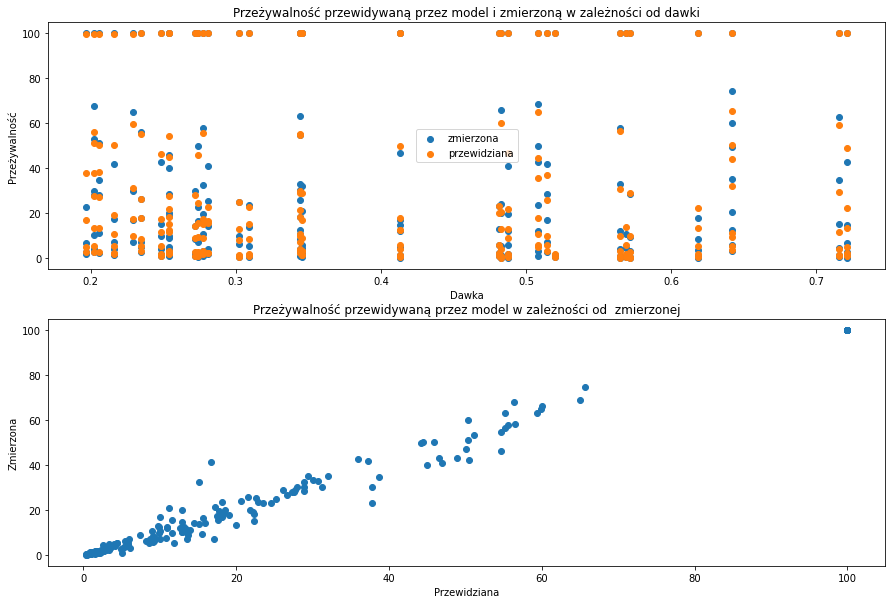

In [5]:
# Wyświetlanie wyników
y_pred = vreg.predict(X)
print('Kwadrat wsp. korelacji: ', r2_score(y_pred, Y))
pearson_correlation, _ = pearsonr(y_pred, Y)
print('Współczynnik korelacji Pearsona: %.5f' % pearson_correlation)

fig, axis = plt.subplots(2,1, figsize=(15, 10))
axis[0].set_title('Przeżywalność przewidywaną przez model i zmierzoną w zależności od dawki')
axis[0].set_xlabel('Dawka')
axis[0].set_ylabel('Przeżywalność')
data = {'zmierzona': Y,'przewidziana': y_pred}
for label, y_value in data.items():
  axis[0].scatter(X['doze'], y_value, label=label)
axis[0].legend()

axis[1].set_title('Przeżywalność przewidywaną przez model w zależności od  zmierzonej')
axis[1].set_xlabel('Przewidziana')
axis[1].set_ylabel('Zmierzona')
axis[1].scatter(y_pred, Y)



